In [1]:
# Import libraries
'''
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
'''

# Pretty display for notebooks
'''
%matplotlib inline
'''

# Allows the use of display() for DataFrames
from IPython.display import display 

# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
train = pd.read_csv("../asset/train.csv")
test = pd.read_csv("../asset/test.csv")
weather = pd.read_csv("../asset/weather.csv")
key = pd.read_csv("../asset/key.csv")
submission_example = pd.read_csv("../asset/sampleSubmission.csv")

# Success - Display the first record
print("Train data : ", train.shape)
print("Test  data : ", test.shape)
print("weather  data : ", weather.shape)
print("key  data : ", key.shape)
print("submission  data : ", submission_example.shape)

import pickle
import awesome_functions as cf

slack_url = pickle.load(open('slackUrl.pickle', 'rb'))
slack_url

# 원본을 유지하기 위해서 카피
df_train = train.copy()
df_weather = weather.copy()
df_key = key.copy()
df_test = test.copy()

Train data :  (4617600, 4)
Test  data :  (526917, 3)
weather  data :  (20517, 20)
key  data :  (45, 2)
submission  data :  (526917, 2)


In [2]:
import pickle

In [3]:
train_preprocess = pickle.load(open("preprocess_date.pkl", "rb"))

In [4]:
train_preprocess.tail()

,date,store_nbr,item_nbr,units,log1p,date2,station_nbr,preciptotal_flag,depart_flag,weekday,is_weekend,is_holiday,is_holiday_weekday,is_holiday_weekend,day,month,year,holiday_name,around_BlackFriday
236033,2014-10-31,35,50,0,0.000000,2014-10-31,5,0.0,0.0,4,0,1,1,0,31,10,2014,Halloween,Else
236034,2014-10-31,35,63,0,0.000000,2014-10-31,5,0.0,0.0,4,0,1,1,0,31,10,2014,Halloween,Else
236035,2014-10-31,35,66,10,2.397895,2014-10-31,5,0.0,0.0,4,0,1,1,0,31,10,2014,Halloween,Else
236036,2014-10-31,35,93,0,0.000000,2014-10-31,5,0.0,0.0,4,0,1,1,0,31,10,2014,Halloween,Else
236037,2014-10-31,35,105,0,0.000000,2014-10-31,5,0.0,0.0,4,0,1,1,0,31,10,2014,Halloween,Else


In [5]:
train_preprocess.columns

Index(['date', 'store_nbr', 'item_nbr', 'units', 'log1p', 'date2',
       'station_nbr', 'preciptotal_flag', 'depart_flag', 'weekday',
       'is_weekend', 'is_holiday', 'is_holiday_weekday', 'is_holiday_weekend',
       'day', 'month', 'year', 'holiday_name', 'around_BlackFriday'],
      dtype='object')

In [6]:
weather_refined = pd.read_csv("weather+holyday_201807041434.csv")

In [7]:
weather_refined.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,stnpressure,sealevel,resultspeed,resultdir,avgspeed,year,month,day,weekday,holiday
19660,20,2014-10-27,85,66,75,6,59,65,0,10,...,29.11,29.82,10.0,18.0,10.4,2014,10,27,0,regular day
19661,20,2014-10-28,80,68,74,5,60,65,0,9,...,29.30,29.97,3.1,36.0,6.4,2014,10,28,1,regular day
19662,20,2014-10-29,78,55,66,-2,47,56,0,1,...,29.42,30.12,4.9,6.0,6.1,2014,10,29,2,regular day
19663,20,2014-10-30,80,52,66,-2,50,57,0,1,...,29.40,30.11,1.6,14.0,4.9,2014,10,30,3,regular day
19664,20,2014-10-31,68,50,59,-9,39,50,6,0,...,29.57,30.27,10.5,36.0,11.2,2014,10,31,4,holiday


In [8]:
weather_refined_drop = weather_refined.drop(["year","month","day","weekday","holiday","sunrise","sunset","snowfall","sealevel","codesum"], axis=1)
weather_refined_drop.tail()

,station_nbr,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,preciptotal,stnpressure,resultspeed,resultdir,avgspeed
19660,20,2014-10-27,85,66,75,6,59,65,0,10,0.0,29.11,10.0,18.0,10.4
19661,20,2014-10-28,80,68,74,5,60,65,0,9,0.0,29.30,3.1,36.0,6.4
19662,20,2014-10-29,78,55,66,-2,47,56,0,1,0.0,29.42,4.9,6.0,6.1
19663,20,2014-10-30,80,52,66,-2,50,57,0,1,0.0,29.40,1.6,14.0,4.9
19664,20,2014-10-31,68,50,59,-9,39,50,6,0,0.0,29.57,10.5,36.0,11.2


In [9]:
total = train_preprocess.merge(weather_refined_drop, on=["date", "station_nbr"], how='inner')
total.tail()

,date,store_nbr,item_nbr,units,log1p,date2,station_nbr,preciptotal_flag,depart_flag,weekday,...,depart,dewpoint,wetbulb,heat,cool,preciptotal,stnpressure,resultspeed,resultdir,avgspeed
229225,2014-10-30,39,111,3,1.386294,2014-10-30,8,0.0,0.0,3,...,-1,60,63,0,5,0.0,29.74,0.30,11.0,0.2
229226,2014-10-31,39,9,12,2.564949,2014-10-31,8,0.0,0.0,4,...,-5,38,65,0,1,0.0,29.82,11.55,20.5,5.1
229227,2014-10-31,39,36,3,1.386294,2014-10-31,8,0.0,0.0,4,...,-5,38,65,0,1,0.0,29.82,11.55,20.5,5.1
229228,2014-10-31,39,103,4,1.609438,2014-10-31,8,0.0,0.0,4,...,-5,38,65,0,1,0.0,29.82,11.55,20.5,5.1
229229,2014-10-31,39,111,2,1.098612,2014-10-31,8,0.0,0.0,4,...,-5,38,65,0,1,0.0,29.82,11.55,20.5,5.1


In [10]:
total.to_csv("total.csv")

In [10]:
cf.saveDataFrameToCsv(total, "total")

In [10]:
total.isna().sum()

date                  0
store_nbr             0
item_nbr              0
units                 0
log1p                 0
date2                 0
station_nbr           0
preciptotal_flag      0
depart_flag           0
weekday               0
is_weekend            0
is_holiday            0
is_holiday_weekday    0
is_holiday_weekend    0
day                   0
month                 0
year                  0
holiday_name          0
around_BlackFriday    0
tmax                  0
tmin                  0
tavg                  0
depart                0
dewpoint              0
wetbulb               0
heat                  0
cool                  0
preciptotal           0
stnpressure           0
resultspeed           0
resultdir             0
avgspeed              0
dtype: int64

In [11]:
cf.isThereNoneData(total)

M Data over 60% : []
T Data over 60% : []
B Data over 60% : []


,Column,Row Count,Missing Data,M Data %,Trace Data,T Data %,Bar Data,B Data %
0,date,229230,0,0.0,0,0.0,0,0.0
1,store_nbr,229230,0,0.0,0,0.0,0,0.0
2,item_nbr,229230,0,0.0,0,0.0,0,0.0
3,units,229230,0,0.0,0,0.0,0,0.0
4,log1p,229230,0,0.0,0,0.0,0,0.0
5,date2,229230,0,0.0,0,0.0,0,0.0
6,station_nbr,229230,0,0.0,0,0.0,0,0.0
7,preciptotal_flag,229230,0,0.0,0,0.0,0,0.0
8,depart_flag,229230,0,0.0,0,0.0,0,0.0
9,weekday,229230,0,0.0,0,0.0,0,0.0


In [12]:
total_1 = total[["tmax","depart","dewpoint","heat","cool","preciptotal","resultspeed","resultdir","avgspeed"]]
# "tavg","wetbulb","stnpressure","tmin",

In [13]:
total_1.tail()

,tmax,depart,dewpoint,heat,cool,preciptotal,resultspeed,resultdir,avgspeed
229225,82,-1,60,0,5,0.0,0.30,11.0,0.2
229226,78,-5,38,0,1,0.0,11.55,20.5,5.1
229227,78,-5,38,0,1,0.0,11.55,20.5,5.1
229228,78,-5,38,0,1,0.0,11.55,20.5,5.1
229229,78,-5,38,0,1,0.0,11.55,20.5,5.1


In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [15]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(total_1.values, i) for i in range(total_1.shape[1])]
vif["features"] = total_1.columns
vif = vif.sort_values("VIF Factor").reset_index(drop=True)
vif

,VIF Factor,features
0,1.173508,preciptotal
1,1.319404,depart
2,2.719923,heat
3,2.802299,cool
4,4.976898,resultdir
5,18.396782,resultspeed
6,29.704886,dewpoint
7,29.798810,avgspeed
8,39.621834,tmax


In [ ]:
# total_drop_w_nonM_item = total_drop_w_nonM[total_drop_w_nonM["item_nbr"]==93]
# model = sm.OLS.from_formula("units ~ tmax + tmin + depart + dewpoint + heat + cool + snowfall + preciptotal + resultspeed + resultdir + avgspeed +C(month) + 0", data=total_drop_w_nonM_item)
# print(model.fit().summary())

In [ ]:
# model = sm.OLS.from_formula("units ~ C(store_nbr):C(item_nbr) + C(holiday):C(item_nbr) + C(weekday):C(item_nbr)  + 0", df_total)

In [16]:
import statsmodels.api as sm

In [66]:
model = sm.OLS.from_formula("units ~ C(item_nbr):preciptotal + C(item_nbr):depart + C(item_nbr):heat", data=total)

In [67]:
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     316.1
Date:                Wed, 04 Jul 2018   Prob (F-statistic):               0.00
Time:                        20:16:58   Log-Likelihood:            -1.1279e+06
No. Observations:              229230   AIC:                         2.256e+06
Df Residuals:                  228905   BIC:                         2.260e+06
Df Model:                         324                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [68]:
model = sm.OLS.from_formula("units ~ C(item_nbr):preciptotal + C(item_nbr):depart + C(item_nbr):heat + C(item_nbr):cool", data=total)

In [69]:
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                     393.4
Date:                Wed, 04 Jul 2018   Prob (F-statistic):               0.00
Time:                        20:19:33   Log-Likelihood:            -1.1066e+06
No. Observations:              229230   AIC:                         2.214e+06
Df Residuals:                  228797   BIC:                         2.219e+06
Df Model:                         432                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [70]:
model_date = sm.OLS.from_formula("units ~ C(item_nbr):preciptotal + C(item_nbr):depart + C(item_nbr):heat + C(item_nbr):cool + C(item_nbr):C(is_weekend)", data=total)

In [71]:
print(model_date.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  units   R-squared:                       0.548
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     427.5
Date:                Wed, 04 Jul 2018   Prob (F-statistic):               0.00
Time:                        20:22:55   Log-Likelihood:            -1.0794e+06
No. Observations:              229230   AIC:                         2.160e+06
Df Residuals:                  228582   BIC:                         2.167e+06
Df Model:                         647                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [22]:
model_date = sm.OLS.from_formula("log1p ~ C(item_nbr):preciptotal + C(item_nbr):depart + C(item_nbr):heat + C(item_nbr):cool + C(item_nbr):C(is_weekend)", data=total)

In [23]:
print(model_date.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  log1p   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     2142.
Date:                Wed, 04 Jul 2018   Prob (F-statistic):               0.00
Time:                        21:19:37   Log-Likelihood:            -2.3172e+05
No. Observations:              229230   AIC:                         4.647e+05
Df Residuals:                  228582   BIC:                         4.714e+05
Df Model:                         647                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [17]:
model_date_scale = sm.OLS.from_formula("log1p ~ C(item_nbr):scale(preciptotal) + C(item_nbr):scale(depart) + C(item_nbr):scale(heat) + C(item_nbr):scale(cool) + C(item_nbr):C(is_weekend)", data=total)

In [18]:
print(model_date_scale.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  log1p   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     2142.
Date:                Thu, 05 Jul 2018   Prob (F-statistic):               0.00
Time:                        13:23:06   Log-Likelihood:            -2.3172e+05
No. Observations:              229230   AIC:                         4.647e+05
Df Residuals:                  228582   BIC:                         4.714e+05
Df Model:                         647                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [28]:
# model_date_scale = sm.OLS.from_formula("log1p ~ C(item_nbr):scale(preciptotal) + C(item_nbr):scale(depart) + C(item_nbr):C(is_weekend) + C(item_nbr):C(store_nbr)", data=total)

In [35]:
# print(model_date_scale.fit().summary())

MemoryError: 

In [13]:
from patsy import dmatrix
# data_transformed = dmatrix(formula, data)

In [23]:
matrix = dmatrix("C(item_nbr):scale(preciptotal) + C(item_nbr):scale(depart) + C(item_nbr):scale(heat) + C(item_nbr):scale(cool) + C(item_nbr):C(is_weekend)", data=total)

DesignMatrix with shape (229230, 648)
  Columns:
    ['Intercept',
     'C(is_weekend)[T.1]',
     'C(item_nbr)[T.2]:C(is_weekend)[0]',
     'C(item_nbr)[T.3]:C(is_weekend)[0]',
     'C(item_nbr)[T.4]:C(is_weekend)[0]',
     'C(item_nbr)[T.5]:C(is_weekend)[0]',
     'C(item_nbr)[T.6]:C(is_weekend)[0]',
     'C(item_nbr)[T.7]:C(is_weekend)[0]',
     'C(item_nbr)[T.8]:C(is_weekend)[0]',
     'C(item_nbr)[T.9]:C(is_weekend)[0]',
     'C(item_nbr)[T.10]:C(is_weekend)[0]',
     'C(item_nbr)[T.11]:C(is_weekend)[0]',
     'C(item_nbr)[T.12]:C(is_weekend)[0]',
     'C(item_nbr)[T.13]:C(is_weekend)[0]',
     'C(item_nbr)[T.14]:C(is_weekend)[0]',
     'C(item_nbr)[T.15]:C(is_weekend)[0]',
     'C(item_nbr)[T.16]:C(is_weekend)[0]',
     'C(item_nbr)[T.17]:C(is_weekend)[0]',
     'C(item_nbr)[T.18]:C(is_weekend)[0]',
     'C(item_nbr)[T.19]:C(is_weekend)[0]',
     'C(item_nbr)[T.20]:C(is_weekend)[0]',
     'C(item_nbr)[T.21]:C(is_weekend)[0]',
     'C(item_nbr)[T.22]:C(is_weekend)[0]',
     'C(ite

In [39]:
matrix_df_l = pd.DataFrame(dmatrix("C(item_nbr):scale(preciptotal) + C(item_nbr):C(store_nbr) + C(item_nbr):C(is_weekend)", data=total))
matrix_df_l

,0,1,2,3,4,5,6,7,8,9,...,4958,4959,4960,4961,4962,4963,4964,4965,4966,4967
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0,-0.000000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0,-0.000000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0,-0.000000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0,-0.000000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0,-0.000000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0,-0.000000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0,-0.000000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0,-0.000000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0,-0.000000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0,-0.000000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000


In [14]:
matrix_df = pd.DataFrame(dmatrix("C(item_nbr):scale(preciptotal) + C(item_nbr):scale(depart) + C(item_nbr):scale(heat) + C(item_nbr):scale(cool) + C(item_nbr):C(is_weekend)", data=total))
matrix_df

,0,1,2,3,4,5,6,7,8,9,...,638,639,640,641,642,643,644,645,646,647
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0,-0.000000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0,-0.000000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0,-0.000000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0,-0.000000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0,-0.000000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000
5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0,-0.000000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000
6,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0,-0.000000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000
7,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0,-0.000000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.0,-0.000000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0,-0.000000,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.000000


In [26]:
from sklearn.datasets import make_regression

In [28]:
from sklearn import linear_model

In [26]:
from sklearn.linear_model import LinearRegression

In [17]:
y = total["log1p"]
X = matrix_df
model = LinearRegression(fit_intercept=True)
model = model.fit(X, y)
# y_new = model.predict(x_new)

In [43]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
model.score(X,y)

0.8584034258203754

In [24]:
def model_check(result) : 
    '''cpu 대용량 필요...'''
    '''residual normality test'''
    Chi_square , P_value = sms.omni_normtest(result.resid)
    normality = pd.DataFrame(columns = [["Residual Normality Test" , "Residual Normality Test"],["Chi Square" , "P-Value"]])
    normality.loc[len(normality)] = [round(Chi_square,2) , round(P_value,2) ]

    '''heteroskedacity test : 종속 변수 값의 분산이 독립 변수의 값과 관계 없이 어느 정도 고정인가?''' 
    a, b, c, d = sms.het_white(result.resid, result.model.exog)
    heteroskedacity = pd.DataFrame(columns =[["Heteroskedacity Test","Heteroskedacity Test","Heteroskedacity Test","Heteroskedacity Test"],['Lagrange Statistic' ,'P-Value', 'F-Value', 'F P-Value' ]])
    heteroskedacity.loc[len(heteroskedacity)] = [round(a ,2 ), round(b, 2), round(c, 2), round(d ,2)]
  
    '''multicollinearity test : condition number 구함''' 
    print("")
    multicollinearity = pd.DataFrame(columns = [["Multicollinearity" ],["condition number"]])
    multicollinearity.loc[len(multicollinearity)] = [round(np.linalg.cond(result.model.exog) ,2)]
    x = pd.concat([normality, heteroskedacity, multicollinearity], axis = 1)
    
    return x

In [22]:
import statsmodels.stats.api as sms

In [25]:
model_check(model)

AttributeError: 'LinearRegression' object has no attribute 'resid'

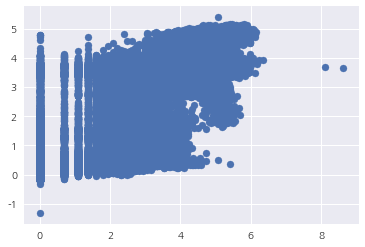

In [36]:
predictions = model.predict(X)

plt.scatter(y, predictions)
# plt.xlabel(u"실제 집값")
# plt.ylabel(u"집값 예측치")
plt.show()

In [38]:
from sklearn import sklearn.metrics.classification_report

ModuleNotFoundError: No module named 'sklearn.metrics.classification_report'

In [33]:
model.coef_

array([ 1.11816625e-17,  9.28541509e-02,  1.75547902e-01, -9.67892202e-02,
       -2.45383351e-02,  3.36575168e+00,  3.16534603e+00,  1.25548086e-01,
        3.01668870e+00,  3.25042172e+00,  1.23419869e-01,  8.33920833e-02,
       -5.95326358e-03,  1.36001141e-01, -6.51053606e-02, -1.24120080e-01,
        3.05930497e+00,  8.26076720e-02,  6.66468536e-02,  5.19301869e-02,
        3.87679693e-01,  2.97526460e-01, -1.38520715e-01,  2.50260425e+00,
        3.24326194e+00,  1.01749673e+00,  2.08610684e+00,  1.38388681e+00,
        2.14742288e-01,  3.10688985e-01,  5.33237614e-02,  7.07027234e-02,
       -4.09761511e-02, -2.19079469e-01,  1.81791456e-01,  3.11667963e+00,
        2.58118969e+00,  2.34982336e-01, -2.21188490e-01, -1.76575127e-01,
        2.87684592e+00,  8.45055267e-01,  3.52249000e+00,  4.38158873e+00,
        3.79444903e+00,  6.64712263e-02,  3.44895324e-01,  2.58215465e+00,
       -2.03030483e-01, -1.68752656e-01, -1.53210685e-01,  2.88397481e-01,
       -5.62075429e-02,  

In [22]:
model_date_scale_1 = sm.OLS.from_formula("log1p ~ scale(preciptotal) + scale(depart) + scale(heat) + scale(cool) + C(is_weekend)", data=total)

In [23]:
print(model_date_scale_1.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  log1p   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     156.4
Date:                Wed, 04 Jul 2018   Prob (F-statistic):          1.86e-166
Time:                        21:51:29   Log-Likelihood:            -4.5538e+05
No. Observations:              229230   AIC:                         9.108e+05
Df Residuals:                  229224   BIC:                         9.108e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.4525      0

In [20]:
result = model_date_scale.fit_regularized(alpha=0.01, L1_wt=1)
print(result.params)

Intercept                             0.676809
C(is_weekend)[T.1]                    0.263453
C(item_nbr)[T.2]:C(is_weekend)[0]     0.000000
C(item_nbr)[T.3]:C(is_weekend)[0]     0.000000
C(item_nbr)[T.4]:C(is_weekend)[0]     0.000000
C(item_nbr)[T.5]:C(is_weekend)[0]     2.745515
C(item_nbr)[T.6]:C(is_weekend)[0]     0.000000
C(item_nbr)[T.7]:C(is_weekend)[0]     0.000000
C(item_nbr)[T.8]:C(is_weekend)[0]     0.000000
C(item_nbr)[T.9]:C(is_weekend)[0]     2.622796
C(item_nbr)[T.10]:C(is_weekend)[0]    0.000000
C(item_nbr)[T.11]:C(is_weekend)[0]    0.000000
C(item_nbr)[T.12]:C(is_weekend)[0]    0.000000
C(item_nbr)[T.13]:C(is_weekend)[0]    0.000000
C(item_nbr)[T.14]:C(is_weekend)[0]    0.000000
C(item_nbr)[T.15]:C(is_weekend)[0]    0.000000
C(item_nbr)[T.16]:C(is_weekend)[0]    2.114771
C(item_nbr)[T.17]:C(is_weekend)[0]    0.000000
C(item_nbr)[T.18]:C(is_weekend)[0]    0.000000
C(item_nbr)[T.19]:C(is_weekend)[0]    0.000000
C(item_nbr)[T.20]:C(is_weekend)[0]    0.000000
C(item_nbr)[T

NameError: name 'plot_statsmodels' is not defined

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.model_selection import KFold

cv = KFold(n_splits=3, shuffle=True, random_state=0)
for train_index, test_index in cv.split(X):
    print("test index :", test_index)
    print("." * 80 )        
    print("train index:", train_index)
    print("=" * 80 )

In [ ]:
# cross validation using k-fold method 
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

dfX = np.array(df.drop('units' , axis = 1))
dfY = np.array(df['units'])
cv = KFold(n_splits=10, random_state=0, shuffle =True)

model = LinearRegression()
count = 0 

for train_index, test_index in cv.split(dfX): 
    count +=1
    x_train, y_train = dfX[train_index] , dfY[train_index]
    x_test , y_test = dfX[test_index] , dfY[test_index]
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score = round(r2_score(y_test, y_pred),3)
    print("Score for fold {} : {}".format(count, score))

In [ ]:
model_date_scale